### Principal Portfolio Analysis: application of PCA for building simplified portfolios that can follow Brazilian stock market index Ibovespa performance

### Requirements

In [ ]:
%%capture

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv(r'cotacoes.csv', sep=',')

### 67 stocks out of 82

In [ ]:
# Passando ações para colunas
df = df.set_index(['ref.date','ticker'])
df = df.unstack(level=-1)

# Consertando o visual
df = df['ret.adjusted.prices']
df = df.rename_axis(None)
df.columns = df.columns.str.rstrip('.SA')

# Retirando nulos
df = df.dropna(axis=0)
df

ticker,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BEEF3,BRAP4,BRFS3,BRKM5,BRML3,...,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,VVAR3,WEGE3,YDUQ3
2011-06-30,-0.006952,-0.013462,0.006809,0.007497,0.004743,0.006154,0.014755,0.007040,-0.016904,0.003929,...,0.014389,0.011299,0.010471,0.000000,-0.007997,0.007097,0.013325,0.000000,-0.032065,0.012579
2011-07-01,0.010027,0.050955,0.004277,0.000747,0.003150,0.030214,0.034743,0.003766,0.004476,0.008368,...,0.000000,-0.010164,0.032454,0.000000,0.015212,0.043494,-0.010889,0.000000,0.020574,0.019803
2011-07-04,0.003714,-0.006461,0.010964,0.006074,0.014467,0.023531,0.012121,-0.001882,-0.010325,-0.016807,...,0.000000,-0.013714,0.001679,0.000000,0.022042,0.012688,-0.012240,0.000000,-0.009401,-0.004914
2011-07-05,0.007847,-0.023420,-0.004936,0.001483,-0.003417,-0.013659,-0.014563,-0.001885,-0.011346,0.001693,...,-0.058840,-0.002304,-0.000336,0.000000,-0.017022,-0.020261,0.015883,0.000000,0.017076,0.016125
2011-07-06,0.004587,-0.007612,-0.008520,-0.014555,-0.012208,0.011719,-0.002448,-0.037682,-0.016103,-0.021665,...,0.000000,0.008041,-0.015562,0.000000,-0.012959,-0.003319,-0.001213,0.000000,0.036991,-0.011211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,-0.001135,-0.026126,-0.013472,-0.009817,-0.005040,-0.002037,-0.026069,-0.013444,0.001185,0.001845,...,-0.004009,-0.002493,0.017360,-0.014706,-0.031395,-0.025182,0.002255,-0.002411,0.009753,0.036238
2021-05-26,-0.007982,0.005865,0.016509,0.023489,0.022672,0.000000,0.016012,-0.011669,0.017997,0.010087,...,-0.002011,0.006634,-0.005450,0.022496,0.011513,0.029001,-0.008825,0.006415,-0.005170,-0.014403
2021-05-27,0.012514,-0.007042,0.013552,0.003061,0.006061,0.023175,0.004179,0.012828,0.004063,0.003643,...,-0.006309,-0.004971,0.019838,-0.004667,-0.003567,0.007143,0.001590,0.016647,0.000305,0.064599
2021-05-28,0.009004,0.029021,0.003285,-0.001748,0.002263,-0.017077,0.005450,-0.005422,-0.000966,0.026907,...,-0.010178,0.004144,-0.001489,-0.009400,0.000510,0.005391,0.001134,0.000000,0.047323,0.003620


In [ ]:
ibov = web.DataReader(f'^BVSP', data_source='yahoo', start=f'06-29-2011', end='06-01-2021')
ibov_ret = ibov[['Adj Close']]
ibov_ret = np.log(ibov_ret[['Adj Close']] / ibov_ret[['Adj Close']].shift(1))
ibov_ret = ibov_ret.dropna(axis=0)
ibov_ret

,Adj Close
Date,
2011-06-30,0.001122
2011-07-01,0.015740
2011-07-04,0.007809
2011-07-05,-0.013425
2011-07-06,-0.007548
...,...
2021-05-26,0.008106
2021-05-27,0.003044
2021-05-28,0.009555


### PCA modeling

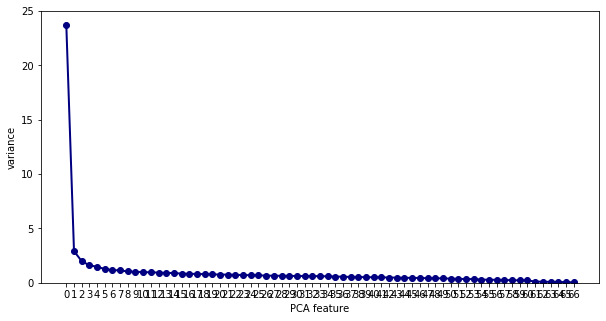

In [ ]:
# Normalize data
df_norm = (df - np.mean(df, axis=0)) / np.std(df, axis=0)

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df_norm)

# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=(10, 5))
plt.plot(features, pca.explained_variance_, 'ro-', linewidth=2, color='navy')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.ylim([0,25])
plt.show()

In [ ]:
df_norm.cov().round(2)

ticker,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BEEF3,BRAP4,BRFS3,BRKM5,BRML3,...,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,VVAR3,WEGE3,YDUQ3
ticker,,,,,,,,,,,,,,,,,,,,,
ABEV3,1.00,0.40,0.39,0.48,0.47,0.22,0.29,0.35,0.30,0.40,...,0.21,0.30,0.28,0.42,0.27,0.27,0.29,0.16,0.37,0.30
B3SA3,0.40,1.00,0.60,0.63,0.63,0.23,0.38,0.34,0.36,0.55,...,0.30,0.33,0.36,0.49,0.40,0.36,0.28,0.22,0.38,0.36
BBAS3,0.39,0.60,1.00,0.76,0.77,0.19,0.39,0.34,0.35,0.57,...,0.31,0.34,0.31,0.49,0.46,0.37,0.32,0.25,0.32,0.41
BBDC3,0.48,0.63,0.76,1.00,0.92,0.20,0.41,0.39,0.39,0.58,...,0.31,0.38,0.32,0.53,0.43,0.38,0.34,0.24,0.39,0.41
BBDC4,0.47,0.63,0.77,0.92,1.00,0.21,0.42,0.39,0.38,0.59,...,0.30,0.39,0.30,0.52,0.44,0.40,0.33,0.23,0.37,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALE3,0.27,0.36,0.37,0.38,0.40,0.24,0.90,0.25,0.35,0.28,...,0.16,0.29,0.22,0.30,0.49,1.00,0.25,0.15,0.24,0.22
VIVT3,0.29,0.28,0.32,0.34,0.33,0.17,0.25,0.21,0.21,0.31,...,0.21,0.40,0.20,0.31,0.20,0.25,1.00,0.17,0.21,0.23
VVAR3,0.16,0.22,0.25,0.24,0.23,0.15,0.15,0.18,0.20,0.24,...,0.14,0.18,0.18,0.26,0.20,0.15,0.17,1.00,0.20,0.22


### Kaiser

In [ ]:
kaiser = sum(pca.explained_variance_ >= 1)
kaiser

10

### Bi-plots

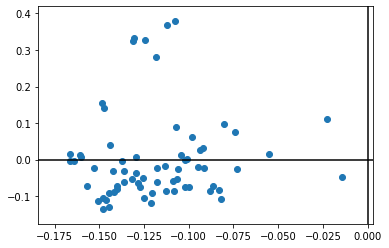

In [ ]:
plt.scatter(pca.components_[0], pca.components_[1])
plt.axvline(x=0, color='black', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')

In [ ]:
pd.DataFrame(pca.components_)[0:kaiser].T

,0,1,2,3,4,5,6,7,8,9
0,-0.117775,-0.023641,0.038244,-0.036563,-0.169866,-0.169991,0.192511,-0.023954,0.076251,-0.012820
1,-0.152811,-0.023367,-0.053479,-0.043802,-0.022245,0.091169,-0.076565,-0.054551,-0.030562,0.080173
2,-0.160064,0.006222,-0.217776,-0.084176,-0.044701,0.098086,-0.015507,-0.058491,-0.039561,0.044149
3,-0.166334,-0.004313,-0.229749,-0.146497,-0.143342,0.033003,0.100983,-0.094319,0.000925,0.026639
4,-0.166509,0.016243,-0.245506,-0.166863,-0.143456,0.047067,0.082630,-0.068533,-0.002783,0.008466
...,...,...,...,...,...,...,...,...,...,...
62,-0.107626,0.378540,0.027026,0.025272,0.019081,-0.165108,-0.073718,0.061581,-0.037922,-0.013485
63,-0.091284,-0.022084,0.019722,0.076322,-0.183487,-0.266559,-0.087750,0.100432,-0.104119,-0.089651
64,-0.072997,-0.025368,0.163567,-0.003981,0.203304,-0.054004,0.091336,-0.139630,-0.034040,0.142519
65,-0.105798,-0.026617,0.172923,-0.034521,-0.093131,-0.144236,0.121417,-0.205403,0.013473,0.199103


### Principal Portfolios weights

In [ ]:
pps = pd.DataFrame(pca.components_)[0:kaiser].T # Autovetores
w_long = []
w_short = []

for i in range(len(pps.columns)):
    w_long.append(pps.loc[pps[i] >= 0, i].sum())
    w_short.append(pps.loc[pps[i] < 0, i].sum())

In [ ]:
pps_weights = pps.copy()

for col in pps.columns:
    for index, value in enumerate(pps[col], start=0):
        is_positive = value >= 0
        
        if is_positive:
            weight = value / w_long[col]
        else:
            weight = value / abs(w_short[col])
            
        pps_weights.loc[index, col] = weight        

pps_weights[0] = pps_weights[0]*-1
pps_weights

,0,1,2,3,4,5,6,7,8,9
0,0.014867,-0.008552,0.009882,-0.013460,-0.048449,-0.051404,0.059035,-0.007651,0.036732,-0.004060
1,0.019290,-0.008453,-0.021580,-0.016125,-0.006345,0.030928,-0.027366,-0.017423,-0.010811,0.026098
2,0.020205,0.002132,-0.087878,-0.030988,-0.012750,0.033274,-0.005542,-0.018681,-0.013994,0.014371
3,0.020997,-0.001560,-0.092710,-0.053930,-0.040884,0.011196,0.030967,-0.030125,0.000445,0.008671
4,0.021019,0.005565,-0.099068,-0.061427,-0.040917,0.015967,0.025339,-0.021889,-0.000984,0.002756
...,...,...,...,...,...,...,...,...,...,...
62,0.013586,0.129691,0.006983,0.007598,0.005766,-0.049927,-0.026348,0.022010,-0.013414,-0.004270
63,0.011523,-0.007989,0.005096,0.022946,-0.052334,-0.080606,-0.031363,0.035896,-0.036830,-0.028389
64,0.009215,-0.009177,0.042264,-0.001466,0.061433,-0.016330,0.028009,-0.044596,-0.012041,0.046393
65,0.013355,-0.009629,0.044681,-0.012708,-0.026563,-0.043616,0.037234,-0.065603,0.006490,0.064812


### Portfolio Returns

In [ ]:
pps_stocks = pps_weights.T
pps_stocks.columns = df.columns
portfolios = pps_stocks.T

pps_returns = pd.DataFrame(np.dot(df,portfolios))
pps_returns.index = df.index

pps_returns

,0,1,2,3,4,5,6,7,8,9
2011-06-30,-0.001354,0.011917,-0.003501,4.450360e-03,-0.014986,0.002313,0.004379,0.008088,-0.009273,0.002628
2011-07-01,0.007976,0.015365,0.012066,-1.154768e-02,0.007761,0.006916,-0.003287,0.008760,-0.003752,0.004830
2011-07-04,0.004661,0.012941,0.000052,8.402004e-05,-0.000675,0.001145,-0.001248,0.002170,0.003972,0.000318
2011-07-05,-0.007195,-0.006412,0.000501,-2.767470e-03,-0.004639,-0.010489,0.007978,0.005290,-0.004681,0.003746
2011-07-06,-0.008738,0.002181,0.004301,4.363197e-03,-0.003450,-0.012236,0.004635,0.004856,-0.007427,0.003713
...,...,...,...,...,...,...,...,...,...,...
2021-05-25,-0.000224,-0.026089,0.008607,-4.394378e-07,0.006018,0.001403,0.005744,-0.006180,-0.003395,-0.006368
2021-05-26,0.007345,0.007013,-0.011616,-1.039854e-02,0.008916,0.005389,0.000297,0.009498,-0.003540,-0.005676
2021-05-27,0.006577,-0.003784,0.010409,-4.674691e-03,0.009830,-0.007046,0.013422,0.002728,0.006686,-0.006146
2021-05-28,0.004379,-0.001914,-0.001926,-1.241143e-02,0.001466,0.006425,-0.004623,-0.001493,-0.019557,0.012534


### Volatility and VaR

In [ ]:
stats = pps_returns.describe().T

exp_ret = np.array(stats['mean'])
port_exp_ret = [i * 0.1 for i in exp_ret]
ret_port = sum(port_exp_ret)

exp_vol = np.array(stats['std'])
port_exp_vol = [i * 0.1 for i in exp_vol]
vol_port = sum(port_exp_vol)

print(ret_port*252)
print(vol_port*252)

0.01099358056653663
3.2484462966008034


In [ ]:
value_at_risk = (1000000 * vol_port*252 * 1.6449)
value_at_risk    

5343369.313278661

### Returns Plots

In [ ]:
pps_returns.plot(subplots=True, 
        linewidth=0.5, 
        layout=(5, 2), 
        figsize=(20, 30), 
        sharex=False,
        sharey=False
       )
plt.ylim([-0.2,0.2])
plt.show()

In [ ]:
ibov_ret.plot(figsize=(7.6,5), color='black', linewidth=0.5)

### Efficient Frontier

In [ ]:
# Pesos aleatórios

weights = np.random.random(kaiser)
weights /= np.sum(weights)
weights.sum()

0.9999999999999998

In [ ]:
def port_ret(weights):
    return np.sum(pps_returns.mean() * weights) * 252
    
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(pps_returns.cov() * 252, weights)))

In [ ]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(kaiser)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

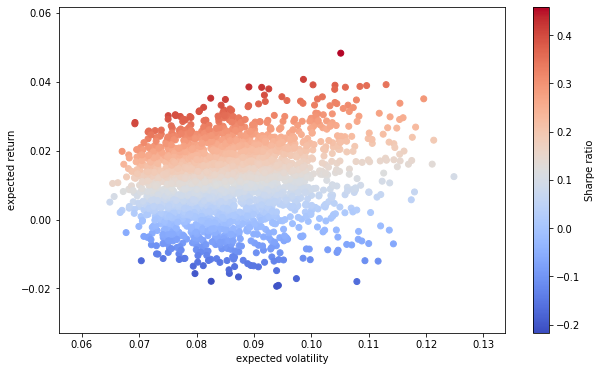

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### Sharpe Index Optimization

In [ ]:
import scipy.optimize as optimize

def min_func_sharpe(weights):
    return -(port_ret(weights)) / port_vol(weights)

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(kaiser))

equal_weights = np.array(kaiser * [1. / kaiser,])
equal_weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [ ]:
min_func_sharpe(equal_weights)

-0.14122490566339502

In [ ]:
opts = optimize.minimize(min_func_sharpe, equal_weights, 
                         method='SLSQP', bounds=bnds,
                         constraints=cons)
opts

     fun: -0.6413288115986783
     jac: array([-1.23956054e-03,  9.38480079e-01,  2.01314688e-04, -4.37960029e-04,
        3.81537102e-01,  6.22738034e-01,  1.01030618e-03,  9.20014232e-01,
        1.60985440e-03,  4.40696478e-02])
 message: 'Optimization terminated successfully.'
    nfev: 148
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([3.32710962e-01, 2.82895452e-16, 2.12412186e-01, 1.59989150e-01,
       6.94431491e-17, 0.00000000e+00, 6.17320205e-02, 0.00000000e+00,
       2.33155682e-01, 1.02050529e-17])

In [ ]:
# Pesos
opts['x'].round(3)

array([0.333, 0.   , 0.212, 0.16 , 0.   , 0.   , 0.062, 0.   , 0.233,
       0.   ])

In [ ]:
# Retornos
port_ret(opts['x']).round(3)

0.061

In [ ]:
# Variância
port_vol(opts['x']).round(3)

0.094

In [ ]:
# Sharpe
(port_ret(opts['x'])) / port_vol(opts['x'])

0.6413288115986783

In [ ]:
# VaR
va_risk = (1000000 * port_vol(opts['x']).round(3) * 1.6449)
va_risk   

154620.6

### Variance Optimization

In [ ]:
optv = optimize.minimize(port_vol, equal_weights, 
                         method='SLSQP', bounds=bnds, 
                         constraints=cons)
optv

     fun: 0.06335375662735585
     jac: array([0.06300626, 0.06331347, 0.06349744, 0.06304057, 0.06321491,
       0.06330351, 0.06352205, 0.06379653, 0.06353237, 0.06324169])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.09140686, 0.03429691, 0.19028172, 0.15596245, 0.05599657,
       0.09631499, 0.20083491, 0.0645558 , 0.05934898, 0.0510008 ])

In [ ]:
# Pesos
optv['x'].round(3)

array([0.091, 0.034, 0.19 , 0.156, 0.056, 0.096, 0.201, 0.065, 0.059,
       0.051])

In [ ]:
# Retorno
port_ret(optv['x']).round(3)

0.011

In [ ]:
# Variância
port_vol(optv['x']).round(3)

0.063

In [ ]:
# Sharpe
(port_ret(optv['x'])) / port_vol(optv['x'])

0.16906681602757226

In [ ]:
# VaR
va_risk = (1000000 * port_vol(optv['x']).round(3) * 1.6449)
va_risk

103628.7